In [11]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
from sklearn.model_selection import train_test_split


from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint


Using TensorFlow backend.


In [6]:
data_train = pd.read_csv("../fashionmnist/fashion-mnist_train.csv")
# Labels 
labels_map = {  0: "T-shirt/top",
                1: "Trouser",
                2: "Pullover",
                3: "Dress",
                4: "Coat",
                5: "Sandal",
                6: "Shirt",
                7: "Sneaker",
                8: "Bag",
                9: "Ankle boot" }

In [8]:
## recreate the train_x array and val_x array
train_x = data_train[list(data_train.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)

## normalize and reshape
train_x = train_x/255.
val_x = val_x/255.

In [9]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

In [12]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

# compile the model
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [13]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0         
__________

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model_2.fit(train_x, train_x, epochs=10, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 291s 6ms/step - loss: 0.0908 - val_loss: 0.0489
Epoch 2/10
48000/48000 [==============================] - 254s 5ms/step - loss: 0.0398 - val_loss: 0.0339
Epoch 3/10
48000/48000 [==============================] - 303s 6ms/step - loss: 0.0311 - val_loss: 0.0285
Epoch 4/10
48000/48000 [==============================] - 242s 5ms/step - loss: 0.0267 - val_loss: 0.0248
Epoch 5/10
48000/48000 [==============================] - 246s 5ms/step - loss: 0.0235 - val_loss: 0.0225
Epoch 6/10
48000/48000 [==============================] - 282s 6ms/step - loss: 0.0214 - val_loss: 0.0206
Epoch 7/10
48000/48000 [==============================] - 262s 5ms/step - loss: 0.0200 - val_loss: 0.0194
Epoch 8/10
48000/48000 [==============================] - 279s 6ms/step - loss: 0.0195 - val_loss: 0.0188
Epoch 9/10
48000/48000 [==============================] - 282s 6ms/step - loss: 0.0184 - val_loss: 0.0

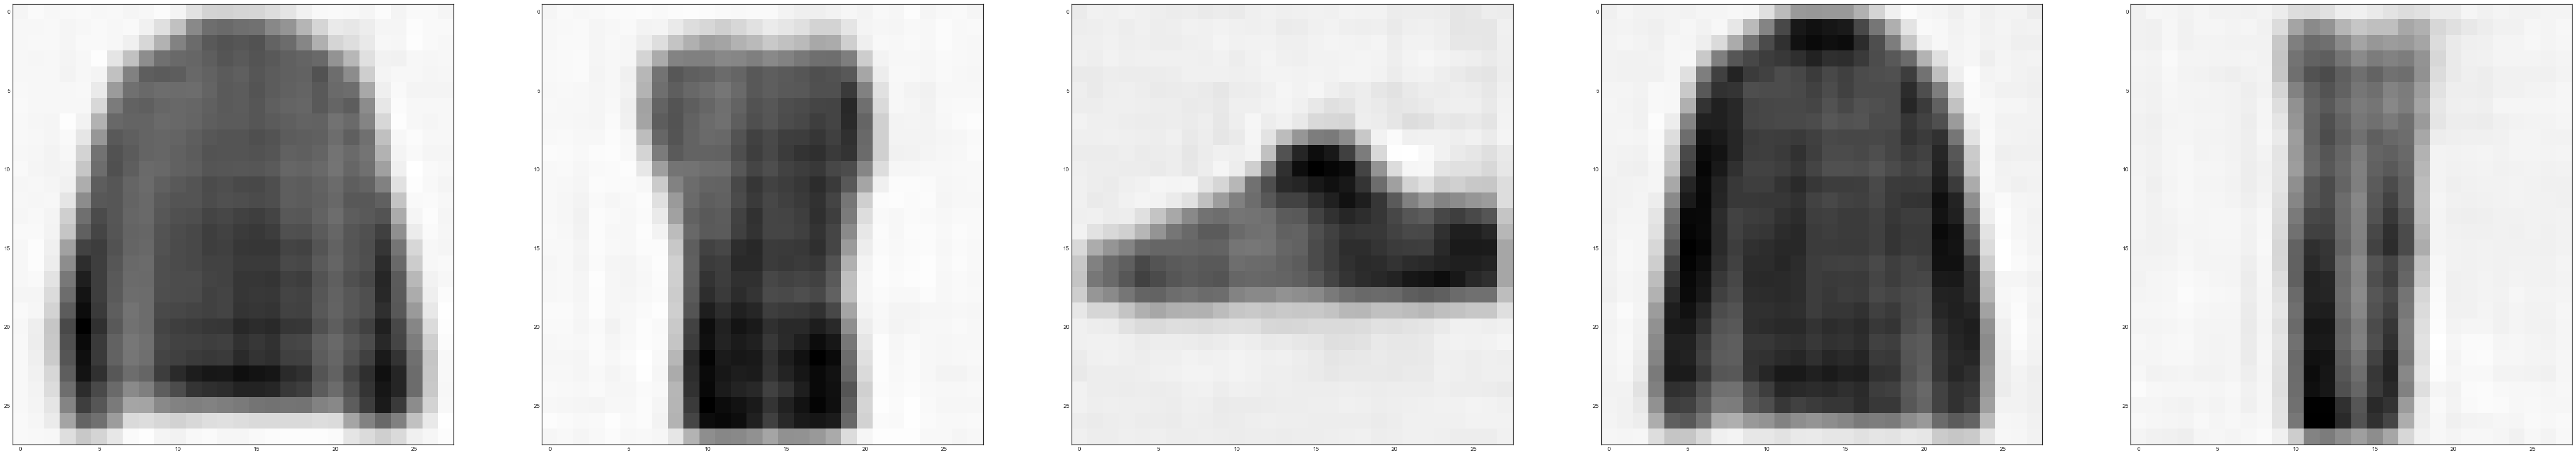

In [15]:
preds = model_2.predict(val_x[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28, 28))
plt.show()